[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


SAMPLE NEWS DATASET (HEADLINES AND CATEGORIES ONLY):
        category                                           headline
0       POLITICS  Senate Approves New Climate Change Bill After ...
1       WELLNESS  Mindfulness Meditation May Help Reduce Anxiety...
2  ENTERTAINMENT  Oscar-Winning Director Announces New Film Project
3         TRAVEL  10 Hidden Gems to Visit in Southeast Asia This...
4     TECHNOLOGY  Apple Unveils Latest iPhone With Revolutionary...
5         SPORTS  Team USA Wins Gold in Olympic Basketball Tourn...
6       BUSINESS  Global Stock Markets React to Federal Reserve ...
7        SCIENCE  NASA Scientists Discover Potential Signs of Li...
8         HEALTH  New Research Links Coffee Consumption to Longe...
9          WORLD  Peace Talks Between Rival Nations Show Signs o...


UPDATED DATAFRAME:
        category                                           headline language  \
0       POLITICS  Senate Approves New Climate Change Bill After ...       en   
1       WELLNESS  

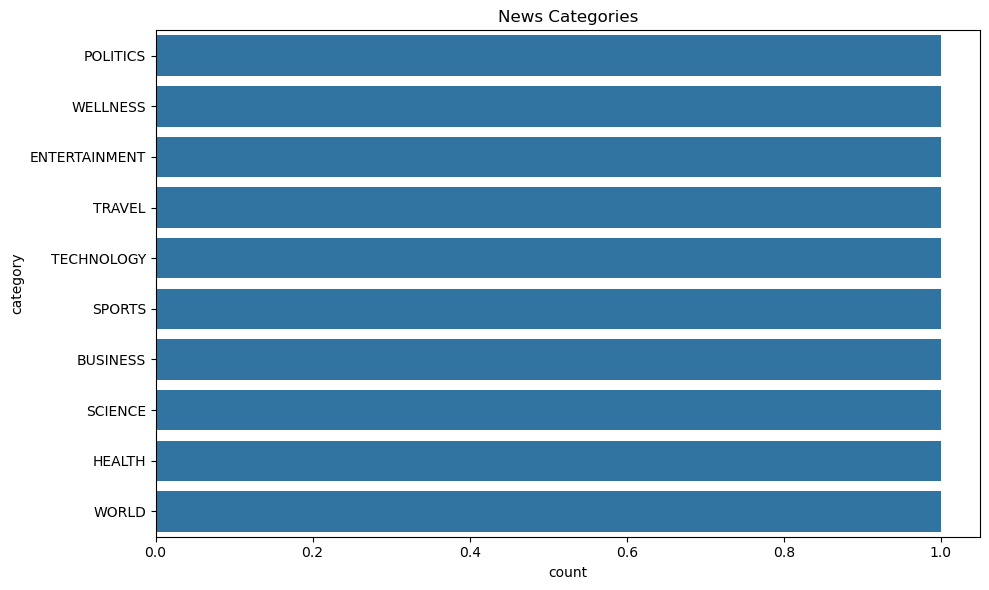

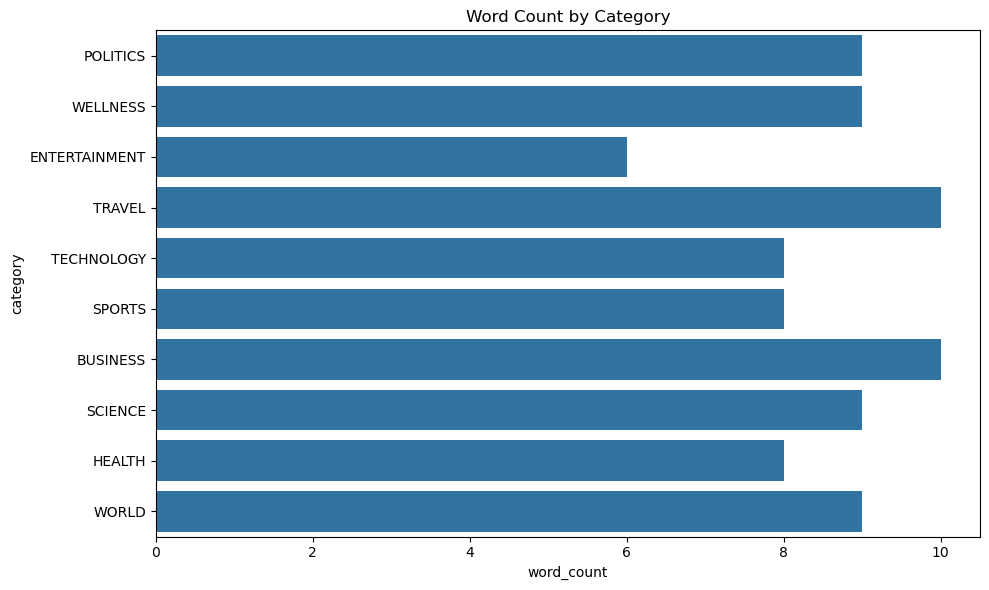

In [3]:
import pandas as pd
from langdetect import detect
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('punkt')

# Create a simple sample dataset with just headlines and categories
sample_data = {
    'category': [
        'POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'TECHNOLOGY',
        'SPORTS', 'BUSINESS', 'SCIENCE', 'HEALTH', 'WORLD'
    ],
    'headline': [
        'Senate Approves New Climate Change Bill After Long Debate',
        'Mindfulness Meditation May Help Reduce Anxiety, Study Shows',
        'Oscar-Winning Director Announces New Film Project',
        '10 Hidden Gems to Visit in Southeast Asia This Summer',
        'Apple Unveils Latest iPhone With Revolutionary Camera Technology',
        'Team USA Wins Gold in Olympic Basketball Tournament',
        'Global Stock Markets React to Federal Reserve Interest Rate Decision',
        'NASA Scientists Discover Potential Signs of Life on Mars',
        'New Research Links Coffee Consumption to Longer Lifespan',
        'Peace Talks Between Rival Nations Show Signs of Progress'
    ]
}

# Create DataFrame from sample data
df = pd.DataFrame(sample_data)

# Display the sample dataset
print("SAMPLE NEWS DATASET (HEADLINES AND CATEGORIES ONLY):")
print(df)
print("\n")

# Define function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Apply language detection to headlines
df["language"] = df["headline"].apply(detect_language)

# Tokenize headlines
df["word_tokens"] = df["headline"].apply(word_tokenize)
df["sentence_tokens"] = df["headline"].apply(sent_tokenize)

# Convert token lists to counts
df["word_count"] = df["word_tokens"].apply(len)
df["sentence_count"] = df["sentence_tokens"].apply(len)

# Display updated dataframe
print("UPDATED DATAFRAME:")
print(df[["category", "headline", "language", "word_count", "sentence_count"]])
print("\n")

# Save simplified dataset
df.to_csv("Simple_News_Category_Dataset.csv", index=False)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df)
plt.title("News Categories")
plt.tight_layout()
plt.show()

# Visualize word count by category
plt.figure(figsize=(10, 6))
sns.barplot(x='word_count', y='category', data=df)
plt.title("Word Count by Category")
plt.tight_layout()
plt.show()

In [ ]:
'''🔹 SECTION 1: Dataset and Preprocessing
❓ Q1. What kind of dataset did you use?
A: It's a manually created sample dataset with 10 rows, where each row contains a news headline and its corresponding category like 'POLITICS', 'SCIENCE', etc.

❓ Q2. Why did you choose to create your own dataset instead of using an existing one?
A: To keep the code lightweight and focused on basic NLP tasks like tokenization, language detection, and visualization. It’s also useful for demo or academic purposes.

❓ Q3. What is the use of langdetect?
A: It automatically detects the language of a given text. In our case, it's used to verify that all headlines are in English.

❓ Q4. What are word_tokenize and sent_tokenize?
A:

word_tokenize splits text into individual words.

sent_tokenize splits text into individual sentences.
We used these from NLTK to analyze the structure of the headlines.

🔹 SECTION 2: Data Analysis
❓ Q5. What kind of analysis did you perform?
A:

Detected language of headlines.

Counted the number of words and sentences per headline.

Visualized category distribution and average word count per category.

❓ Q6. Why are you counting words and sentences?
A:
To get an idea of the complexity and length of each headline. This can be useful in text classification or readability analysis.

❓ Q7. What do your visualizations show?
A:

Category Distribution Chart shows how many headlines belong to each news category.

Bar Plot of Word Count shows which category tends to have longer or shorter headlines.

🔹 SECTION 3: Code and Libraries
❓ Q8. Why did you use try-except in the detect_language function?
A:
To handle any errors in language detection gracefully—for example, if the input is empty or too short.

❓ Q9. What does nltk.download('punkt') do?
A:
It downloads the Punkt tokenizer models, which are needed by word_tokenize and sent_tokenize to split text properly.

❓ Q10. Why did you save the dataset as a CSV?
A:
For reusability and further analysis—CSV files are a common format for storing structured data and can be easily loaded later.

'''